In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
from scipy import stats
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
sns.set_style(style='whitegrid')

In [2]:
#Define the location of the Data
path = '../data/'

In [3]:
df = pd.read_csv(f'{path}raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [5]:
resumetable(df)

Dataset Shape: (7043, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK,12.78
1,gender,object,0,2,Female,Male,Male,1.00
2,SeniorCitizen,int64,0,2,0,0,0,0.64
3,Partner,object,0,2,Yes,No,No,1.00
4,Dependents,object,0,2,No,No,No,0.88
5,tenure,int64,0,73,1,34,2,5.92
6,PhoneService,object,0,2,No,Yes,Yes,0.46
7,MultipleLines,object,0,3,No phone service,No,No,1.36
8,InternetService,object,0,3,DSL,DSL,DSL,1.53
9,OnlineSecurity,object,0,3,No,Yes,Yes,1.50


In [6]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [7]:
df['SeniorCitizen'] = df.SeniorCitizen.replace({1:"Yes", 0:"No"})

# EDA

## Customer Churn by Category

Let's extract the category columns to perform EDA on all items at once. Some categories also have 3 unique values. We'll see why.

In [8]:
df.columns[1:-3]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [9]:
categories = list(df.columns[1:-3])

In [10]:
categories.pop(4)

'tenure'

In [11]:
categories

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [12]:
non_cats = []
for item in enumerate(list(~df.columns.isin(categories))):
    if item[1] == True:
        non_cats.append(df.columns[item[0]])

In [13]:
non_cats

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [14]:
non_cats.pop(0)

'customerID'

In [15]:
non_cats.pop(-1)

'Churn'

In [16]:
non_cats

['tenure', 'MonthlyCharges', 'TotalCharges']

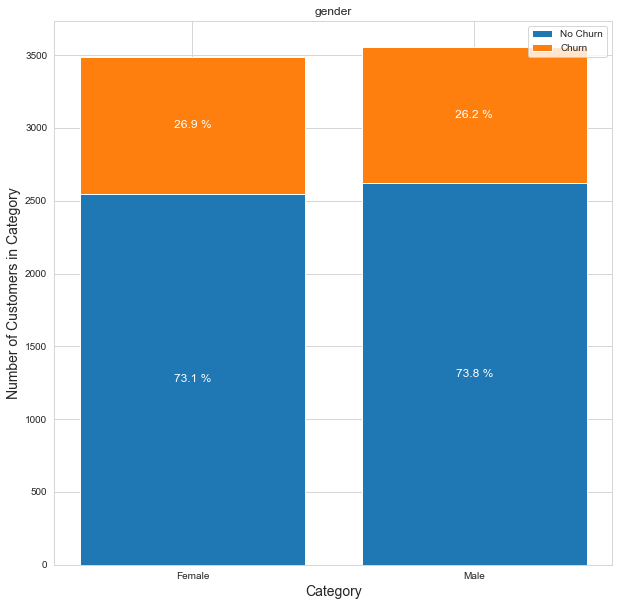

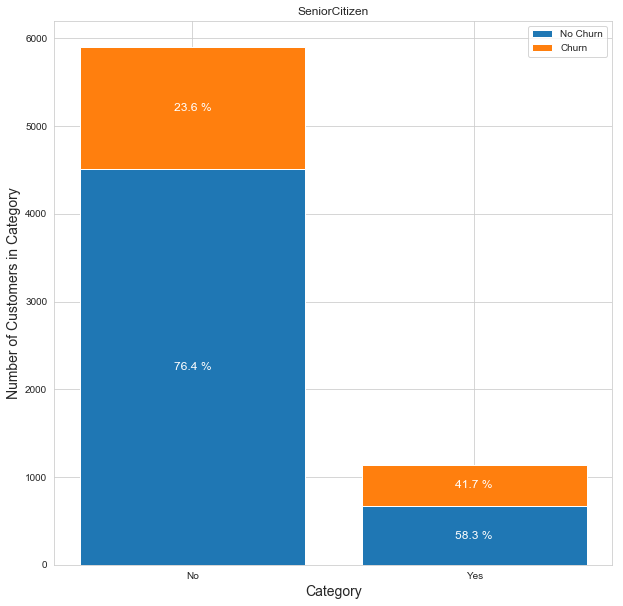

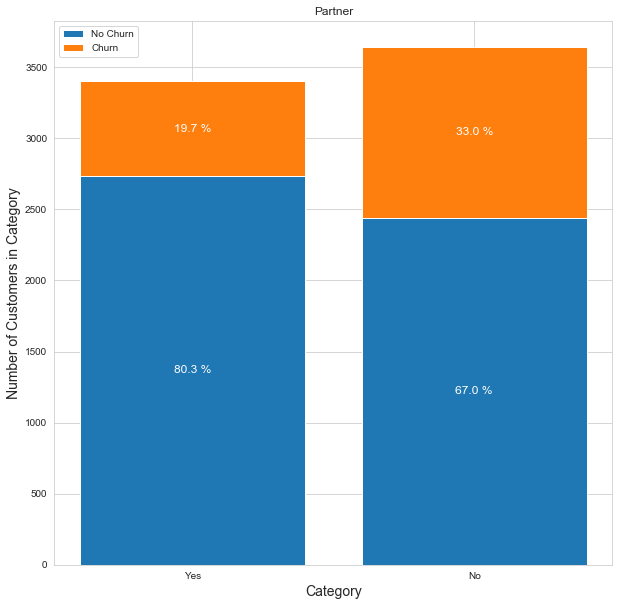

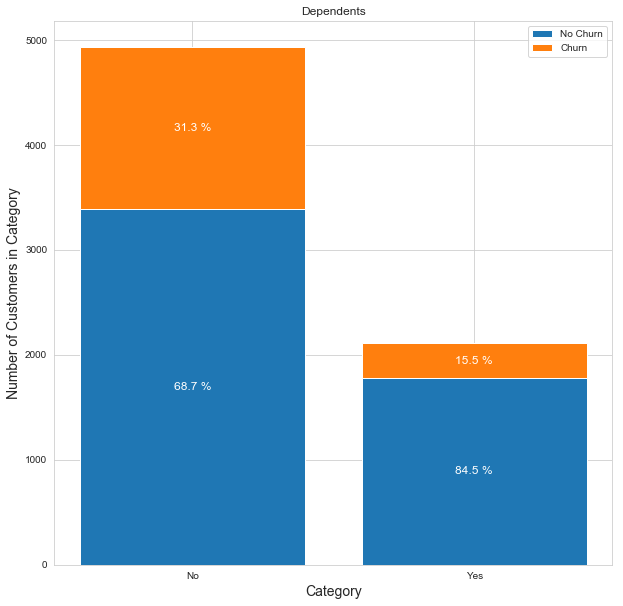

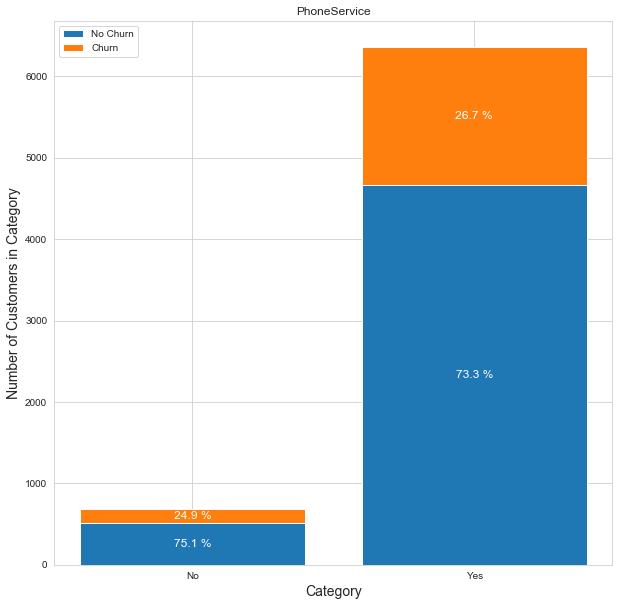

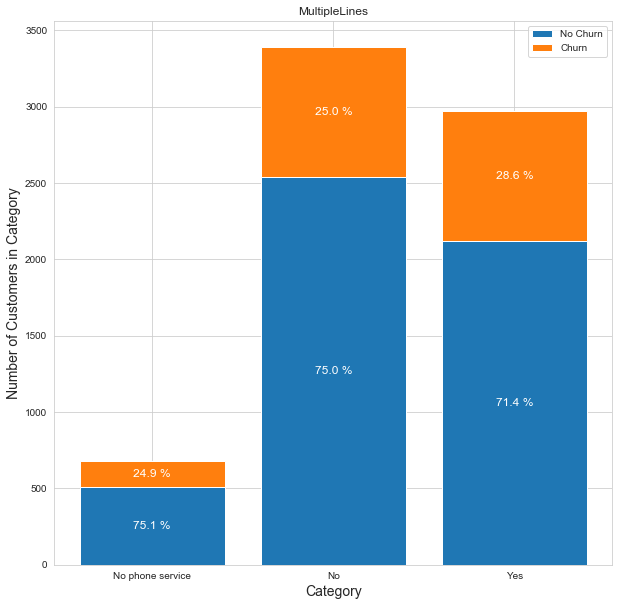

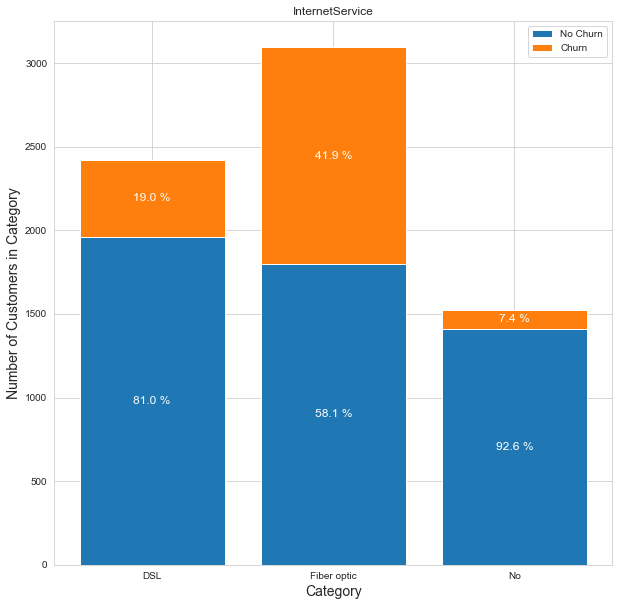

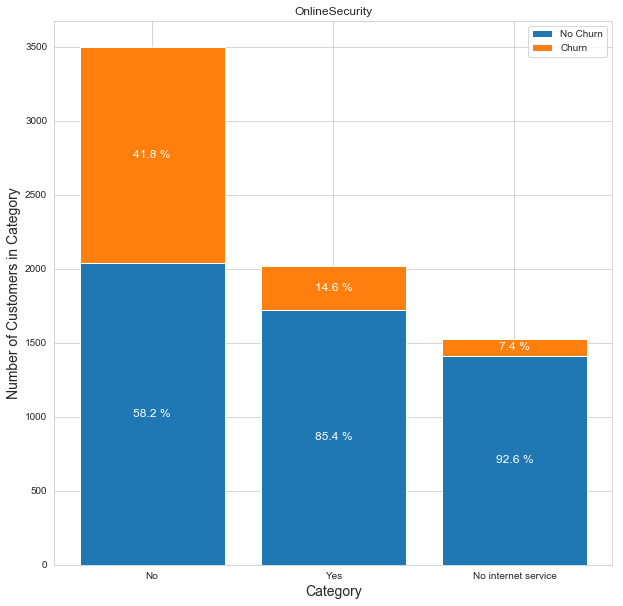

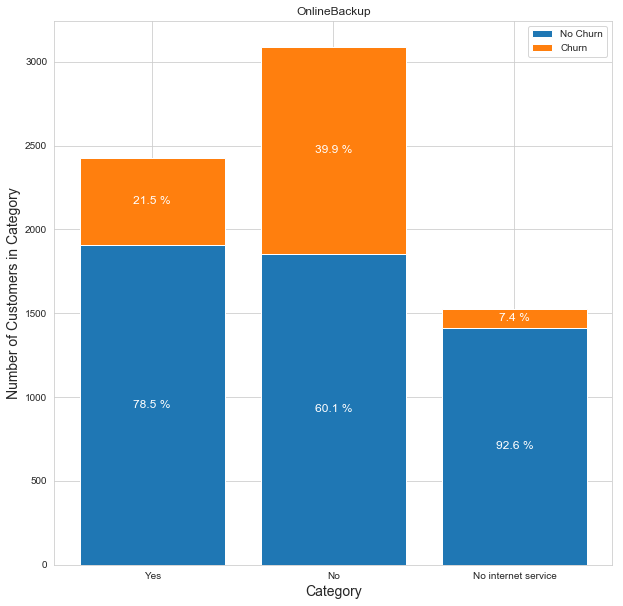

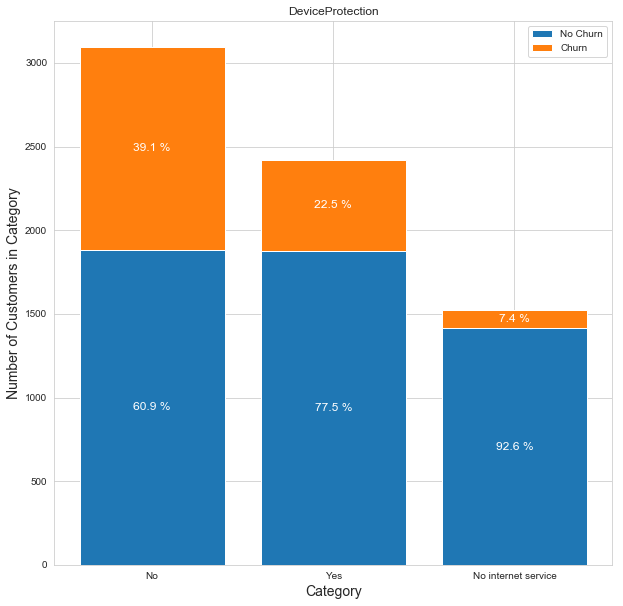

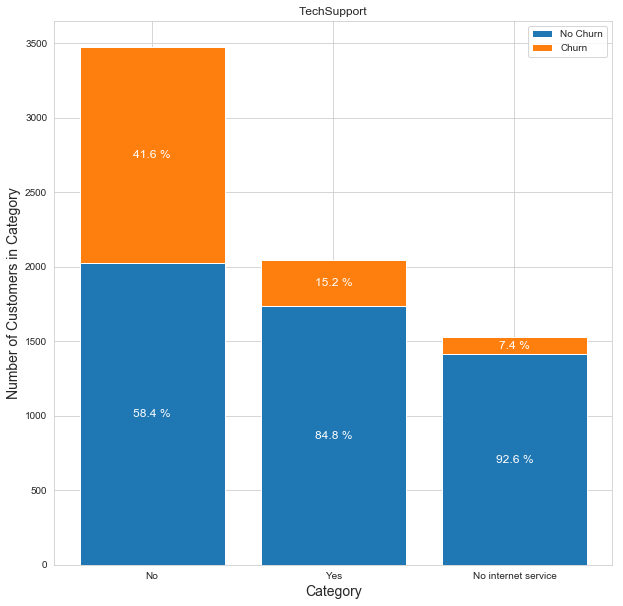

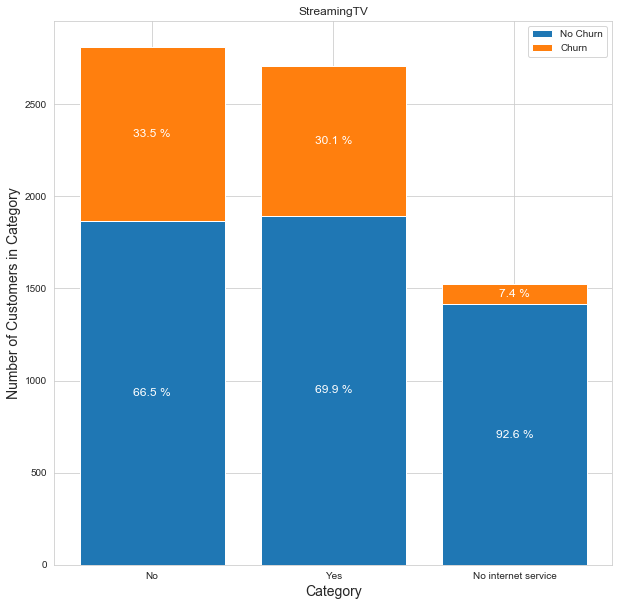

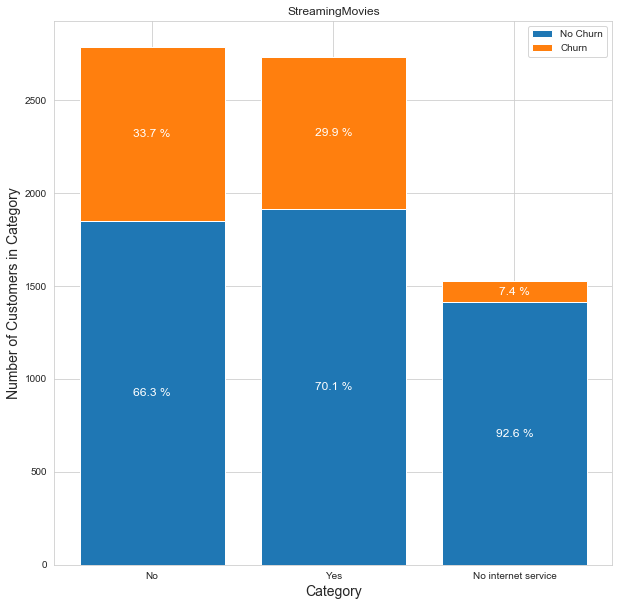

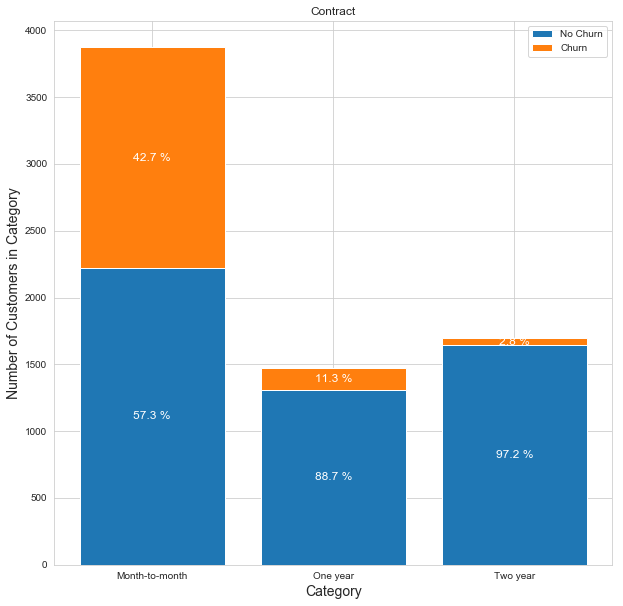

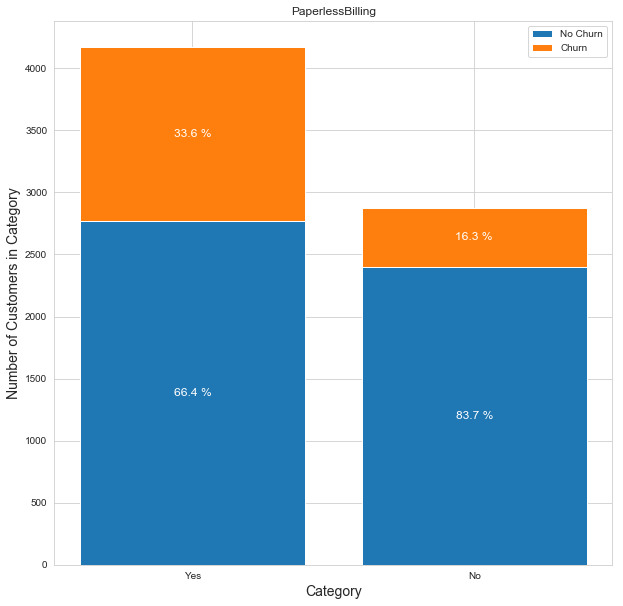

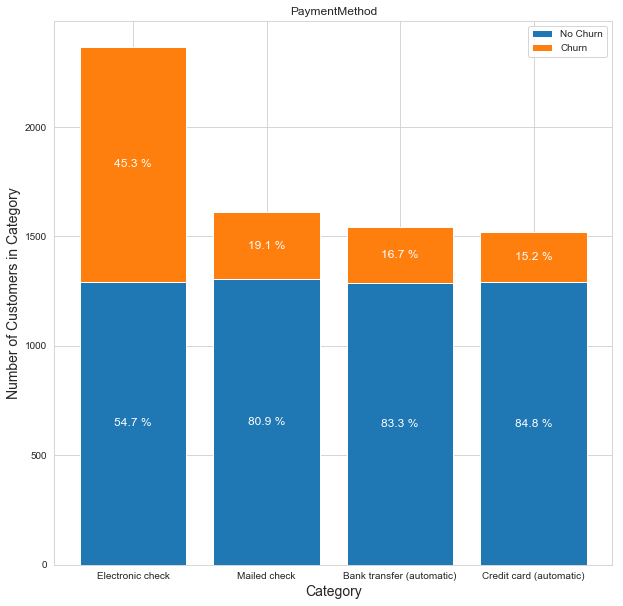

In [17]:
for cat in categories:
    fig, ax = plt.subplots(figsize = (10,10))
    churn_no = []
    churn_yes = []
    x = []
    for i in df[cat].unique():
        #each category has a sub-category: e.g. Gender category has male and female
        #looping through each subcategory and adding churn and no churn data to list
        churn_no.append(df.groupby([cat, 'Churn']).size()[i][0])
        churn_yes.append(df.groupby([cat, 'Churn']).size()[i][1])
        x.append(i)
    #print(churn_no, churn_yes)
    
    p1 = plt.bar(x, churn_no)
    p2 = plt.bar(x, churn_yes, bottom=churn_no)

    #Plotting the bar labels inside the bars, as percentage
    for r1, r2, in zip(p1, p2):
        height1 = r1.get_height()
        height2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., #x
                 height1 / 2., #y
                 f'{round(height1 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)
        plt.text(r2.get_x() + r2.get_width() / 2., #x
                 height1 + height2 / 2., #y
                 f'{round(height2 / (height1 + height2)*100,1)} %', #s
                 ha="center", va="center", color="white", fontsize=12)


    
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Number of Customers in Category', fontsize=14)
    plt.legend(['No Churn','Churn'])
    plt.title(cat)
    plt.show()

## Customer Churn by non-categorical items

In [18]:
non_cats

['tenure', 'MonthlyCharges', 'TotalCharges']

In [19]:
len(df.tenure.unique())

73

Text(0, 0.5, 'Count of Customers')

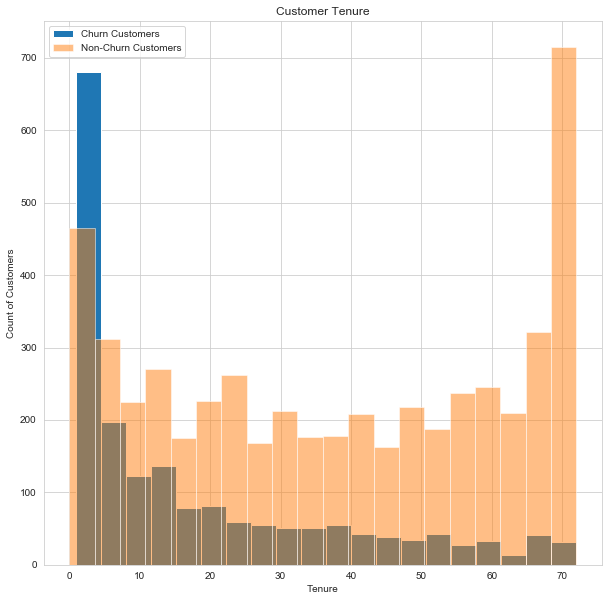

In [175]:
fig, ax = plt.subplots(figsize = (10,10))
df.tenure[df.Churn == 'Yes'].hist(bins=20)
df.tenure[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count of Customers')

Text(0, 0.5, 'Count of Customers')

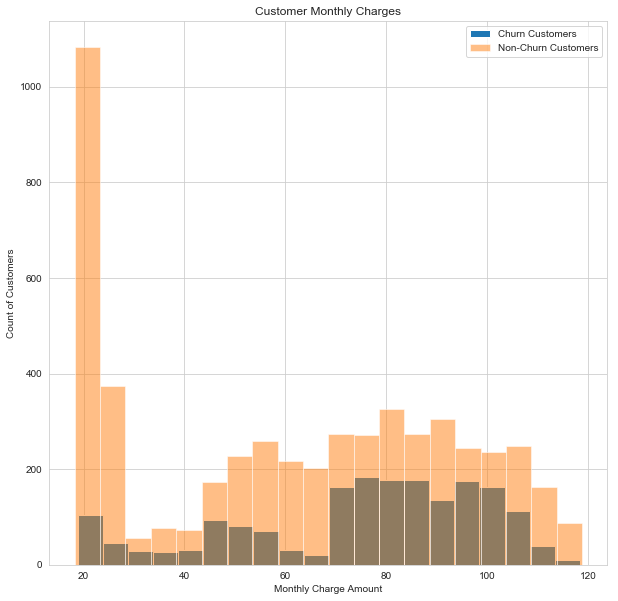

In [176]:
fig, ax = plt.subplots(figsize = (10,10))
df.MonthlyCharges[df.Churn == 'Yes'].hist(bins=20)
df.MonthlyCharges[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Monthly Charges')
plt.xlabel('Monthly Charge Amount')
plt.ylabel('Count of Customers')

Text(0, 0.5, 'Count of Customers')

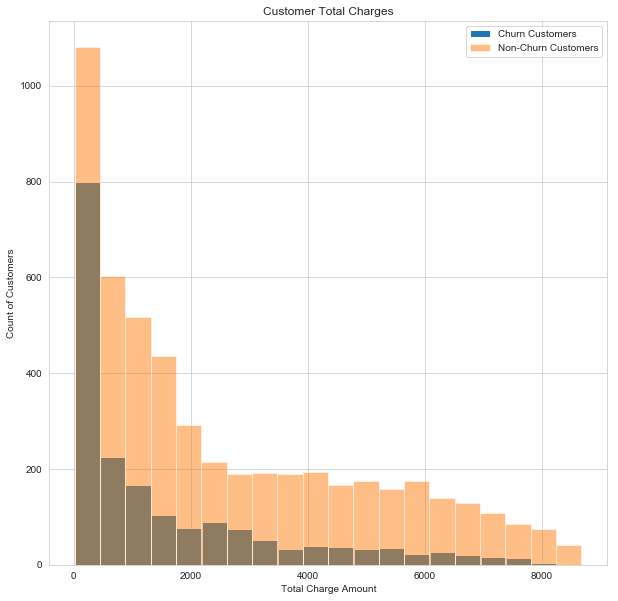

In [177]:
fig, ax = plt.subplots(figsize = (10,10))
df.TotalCharges[df.Churn == 'Yes'].hist(bins=20)
df.TotalCharges[df.Churn == 'No'].hist(bins=20, alpha=0.5)
plt.legend(['Churn Customers', 'Non-Churn Customers'])
plt.title('Customer Total Charges')
plt.xlabel('Total Charge Amount')
plt.ylabel('Count of Customers')

## Churn Imbalance

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
df.groupby('Churn').size().values

array([5174, 1869])

In [89]:
df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

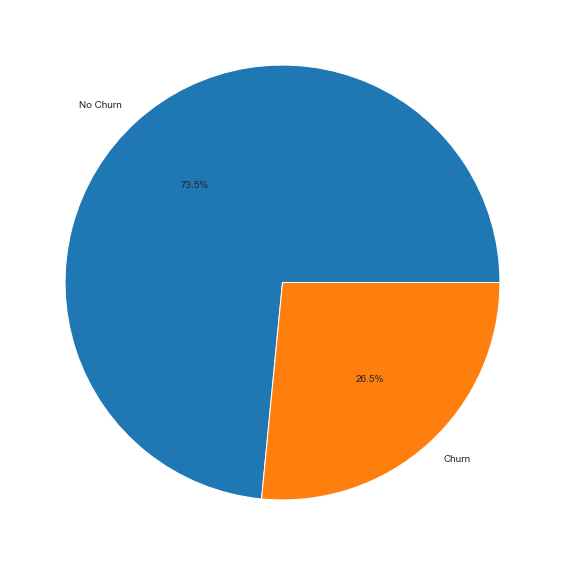

In [90]:
fig, ax = plt.subplots(figsize = (10,10))
labels = 'No Churn', 'Churn'
x = df.groupby('Churn').size().values
ax.pie(x, autopct='%1.1f%%', labels=labels)
plt.show()

## Correlation

### Encode the dataframe

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
len(df.columns)

21

In [37]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
categories

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [39]:
non_cats

['tenure', 'MonthlyCharges', 'TotalCharges']

In [40]:
other = ['customerID', 'Churn']

In [41]:
len(non_cats)+len(categories)+len(other)

21

In [42]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We'll have to encode all categorical values in the dataframe. We already defined the lists 'categories' and 'other'.

In [43]:
encoded_df = pd.DataFrame()

In [44]:
for item in categories:
    encoded_df[item] = le.fit_transform(df[item].values)

In [45]:
for item in non_cats:
    encoded_df[item] = df[item]

In [46]:
for item in other:
    encoded_df[item] = le.fit_transform(df[item].values)

In [47]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID,Churn
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,1,29.85,29.85,5375,0
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,34,56.95,1889.50,3962,0
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,2,53.85,108.15,2564,1
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,45,42.30,1840.75,5535,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,2,70.70,151.65,6511,1


In [48]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(15, 15))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

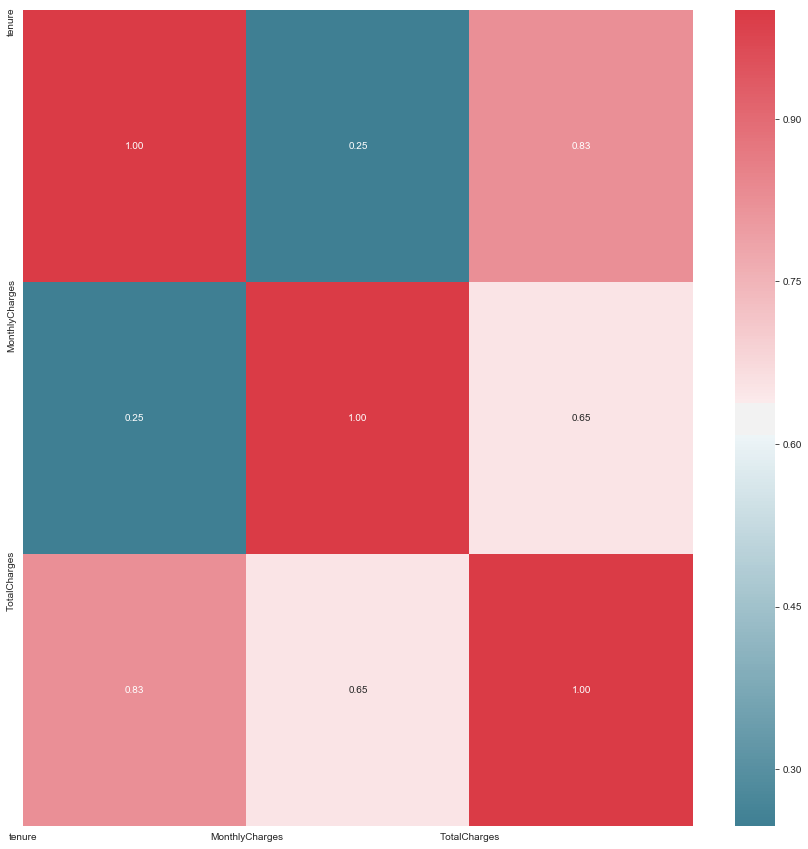

In [49]:
heatMap(df)

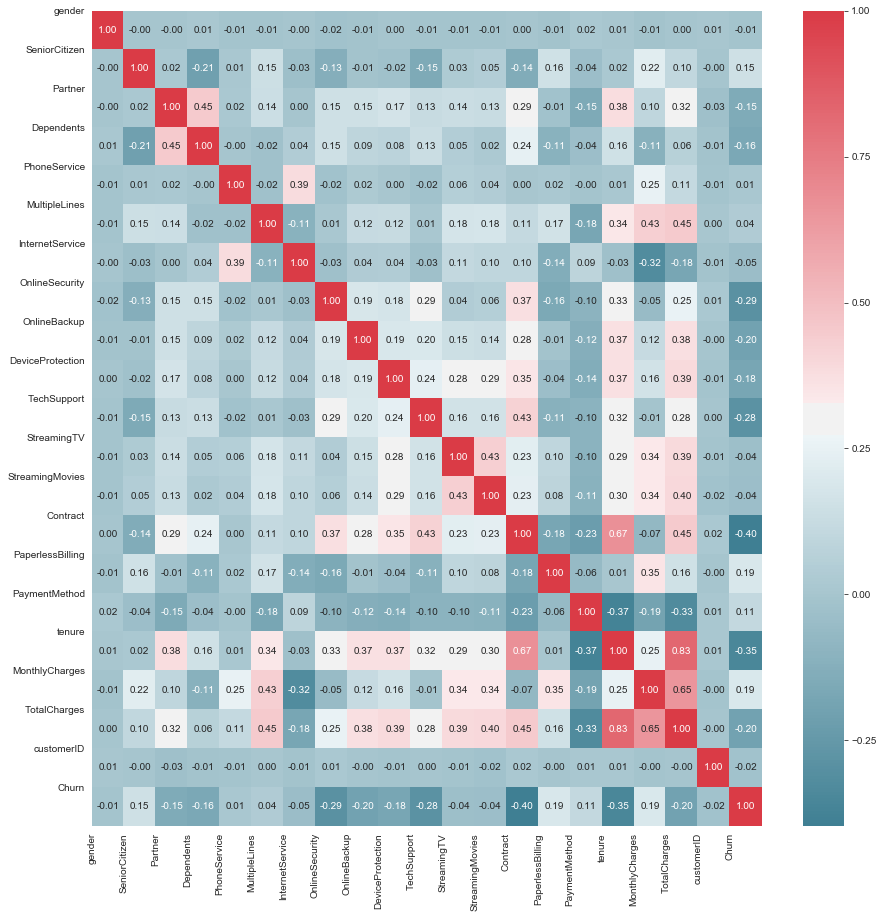

In [50]:
heatMap(encoded_df)

# Preprocessing

In [52]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID,Churn
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,1,29.85,29.85,5375,0
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,34,56.95,1889.50,3962,0
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,2,53.85,108.15,2564,1
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,45,42.30,1840.75,5535,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,2,70.70,151.65,6511,1


In [97]:
encoded_df = encoded_df.fillna(0)

In [98]:
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,customerID,Churn
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,1,29.85,29.85,5375,0
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,34,56.95,1889.50,3962,0
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,2,53.85,108.15,2564,1
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,45,42.30,1840.75,5535,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,2,70.70,151.65,6511,1


## Dealing with imbalance by downsampling

In [99]:
from sklearn.utils import resample

In [100]:
down = encoded_df[encoded_df.Churn == 1]
up = encoded_df[encoded_df.Churn == 0]
down = down.Churn.count()
up = up.Churn.count()
print(f'Churn Fraction: {down/(up+down)}')

Churn Fraction: 0.2653698707936959


In [101]:
#let's first separate majority class and minority class and resample

df_majority = encoded_df[encoded_df.Churn == 0]
df_minority = encoded_df[encoded_df.Churn == 1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=down,     # to match minority class
                                 random_state=42) # reproducible results
# combine the new dataframes
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.Churn.value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

## Define X and y

In [199]:
from sklearn.model_selection import train_test_split
y = df_downsampled.Churn
X = df_downsampled.drop(columns=['Churn'])

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Modeling - BASE

In [141]:
#import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,\
precision_score, recall_score, precision_recall_curve, classification_report, roc_auc_score

In [202]:
import lightgbm as lgb

In [ ]:
'''params = {'learning_rate':0.001,
          'objective' :'binary',
          'num_leaves' : 5000,
          'feature_fraction': .2, 
          'bagging_fraction': .91, 
          'bagging_freq':1,
          'boosting_type' : 'gbdt',
          'metric': 'binary_logloss'}'''

In [189]:
clf = lgb.LGBMClassifier(drop_rate=0.9, min_data_in_leaf=1000, max_bin=255,
                         n_estimators=5000, min_sum_hessian_in_leaf=1, importance_type='gain',
                         learning_rate=0.2, bagging_fraction=0.9, colsample_bytree=1.0,
                         feature_fraction=0.1, lambda_l1=5.0, lambda_l2=3.0, max_depth=9,
                         min_child_samples=55, min_child_weight=5.0, min_split_gain=0.1,
                         num_leaves=4000, subsample = 0.75)  

In [192]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       379
           1       0.77      0.77      0.77       369

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



In [194]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7713903743315508
Precision: 0.7661290322580645
Recall: 0.7723577235772358
Confusion Matrix: [[292  87]
 [ 84 285]]


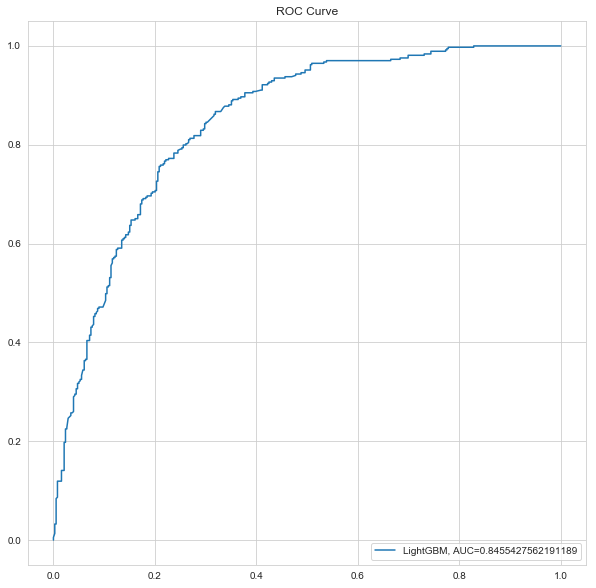

In [196]:
fig, ax = plt.subplots(figsize = (10,10))
y_prob = clf.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label="LightGBM, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

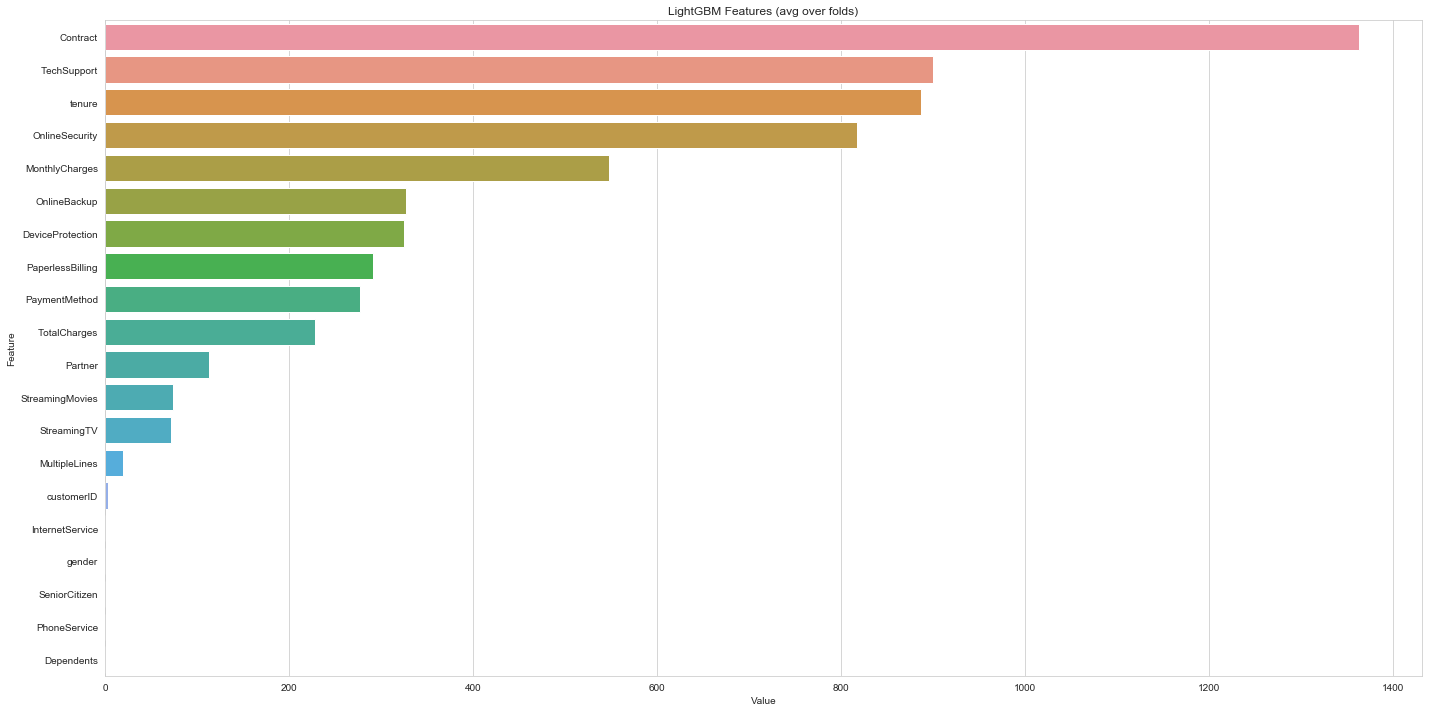

In [201]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

## Scikit-Learn and XGBoost Classifiers

In [147]:
#Import classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [148]:
#instantiate models
seed = 42
clf = RandomForestClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
ada = AdaBoostClassifier(random_state=seed)
xtr = ExtraTreesClassifier(random_state=seed)

In [149]:
classifiers = [('Random Forest', clf), ('XGBoost', xgb), ('ExtraTrees', xtr)]

name: Random Forest
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       379
           1       0.75      0.72      0.73       369

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748

accuracy: 0.7433155080213903
precision: 0.7521367521367521
recall: 0.7154471544715447
confusion matrix: [[292  87]
 [105 264]]
------------------------------


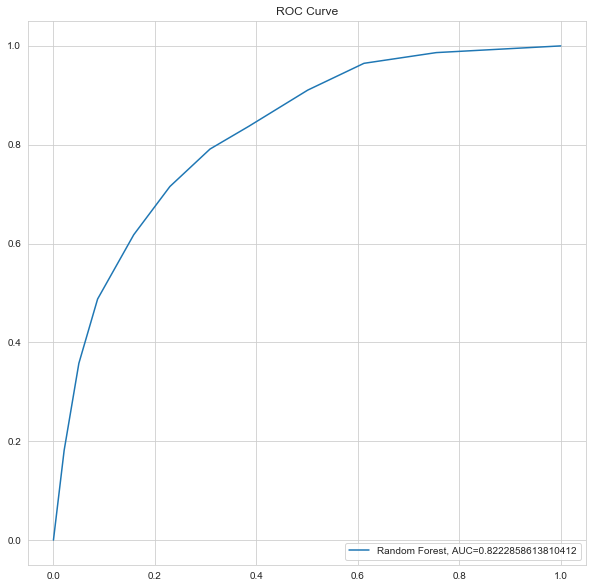

name: XGBoost
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       379
           1       0.77      0.79      0.78       369

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748

accuracy: 0.7834224598930482
precision: 0.7745358090185677
recall: 0.7913279132791328
confusion matrix: [[294  85]
 [ 77 292]]
------------------------------


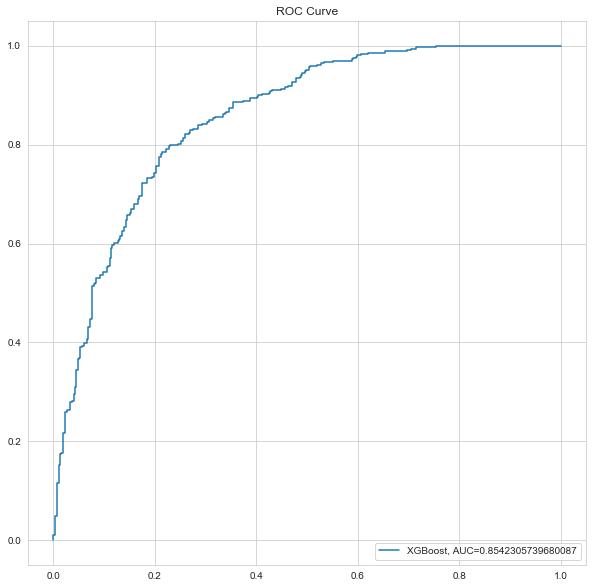

name: ExtraTrees
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       379
           1       0.75      0.68      0.72       369

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748

accuracy: 0.732620320855615
precision: 0.7522388059701492
recall: 0.6829268292682927
confusion matrix: [[296  83]
 [117 252]]
------------------------------


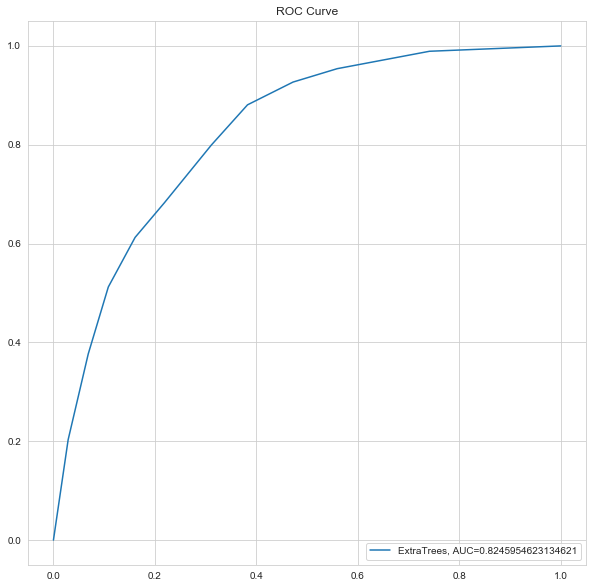

In [151]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf_algo in classifiers:    
 
    # Fit clf to the training set
    clf_algo.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf_algo.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
   
    # Evaluate clf's accuracy on the test set
    print(f'name: {clf_name}')
    print(classification_report(y_test, y_pred))
    # Evaluate clf's accuracy on the test set 
    print(f'accuracy: {accuracy}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'confusion matrix: {cm}')
    print('------------------------------')
    
    fig, ax = plt.subplots(figsize = (10,10))
    y_prob = clf_algo.predict_proba(X_test)[::,1]
    y_pred_proba = y_prob
    fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
    auc_rand = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr_rand,tpr_rand,label=f"{clf_name}, AUC="+str(auc_rand))
    plt.legend(loc=4)
    plt.title('ROC Curve')
    plt.show()

name: Voting Classifier
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       379
           1       0.78      0.76      0.77       369

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748

accuracy: 0.7754010695187166
precision: 0.778393351800554
recall: 0.7615176151761518
confusion matrix: [[299  80]
 [ 88 281]]
------------------------------


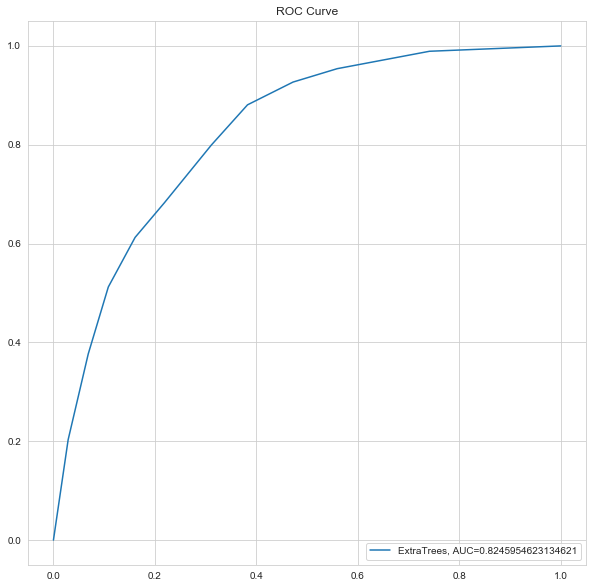

In [152]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


# Evaluate clf's accuracy on the test set
print(f'name: Voting Classifier')
print(classification_report(y_test, y_pred))
# Evaluate clf's accuracy on the test set 
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'confusion matrix: {cm}')
print('------------------------------')

fig, ax = plt.subplots(figsize = (10,10))
y_prob = clf_algo.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label=f"{clf_name}, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()

### Tuning

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [118]:
# Number of trees for tree ensambles
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 105, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [6, 8, 12]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

#### Random Forest

In [119]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [50, 63, 77, 91, 105, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [6, 8, 12],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [100, 200, 300]}


In [120]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 20, \
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [121]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 63,
 'bootstrap': True}

In [125]:
rf_params = rf_random.best_params_

#### XGBoost

In [122]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              #'objective':['reg:linear'],
              'learning_rate': [0.01, 0.1],
              'max_depth': [6, 12], 
              'min_child_weight': [2, 6],
              #'verbosity': [1],
              'subsample': [1.0],
              'colsample_bytree': [0.3, 0.5],
              'gamma': [0],
              'n_estimators': [100, 150]}

xgb_rand = RandomizedSearchCV(xgb,
                              parameters,
                              cv = 3,
                              n_jobs = 4,
                              verbose=True)

xgb_rand.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    5.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, scal...
                                           seed=None, silent=True,
                                           subsample=1),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distributions={'cols

In [123]:
xgb_rand.best_params_

{'subsample': 1.0,
 'nthread': 4,
 'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 0.5}

In [124]:
xgb_params = xgb_rand.best_params_

#### Extra Randomized Trees

In [126]:
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
             }

In [127]:
xtr_tune = RandomizedSearchCV(estimator = xtr, param_distributions = param_dist, n_iter = 50, \
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xtr_tune.fit(X_train, y_train)
xtr_tune.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   22.4s finished


{'n_estimators': 100,
 'min_samples_split': 20,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 105,
 'bootstrap': True}

In [128]:
xtr_params = xtr_tune.best_params_

### Tuned Model

In [155]:
#instantiate models
seed = 42
new_clf = RandomForestClassifier(**rf_random.best_params_, random_state=seed)
new_xgb = XGBClassifier(**xgb_rand.best_params_, random_state=seed)
new_xtr = ExtraTreesClassifier(**xtr_tune.best_params_, random_state=seed)

In [156]:
classifiers = [('Random Forest', new_clf), ('XGBoost', new_xgb), ('ExtraTrees', new_xtr)]

name: Random Forest
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       379
           1       0.78      0.81      0.79       369

    accuracy                           0.79       748
   macro avg       0.79      0.79      0.79       748
weighted avg       0.79      0.79      0.79       748

accuracy: 0.7901069518716578
precision: 0.7760416666666666
recall: 0.8075880758807588
confusion matrix: [[293  86]
 [ 71 298]]


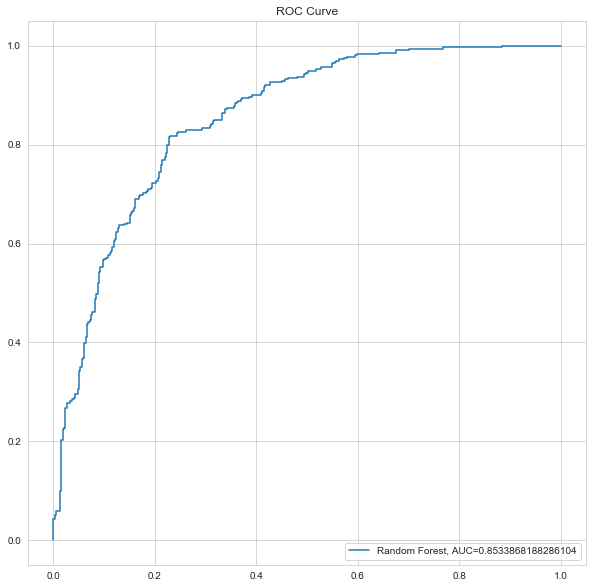

name: XGBoost
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       379
           1       0.76      0.81      0.78       369

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748

accuracy: 0.7780748663101604
precision: 0.7569620253164557
recall: 0.8102981029810298
confusion matrix: [[283  96]
 [ 70 299]]


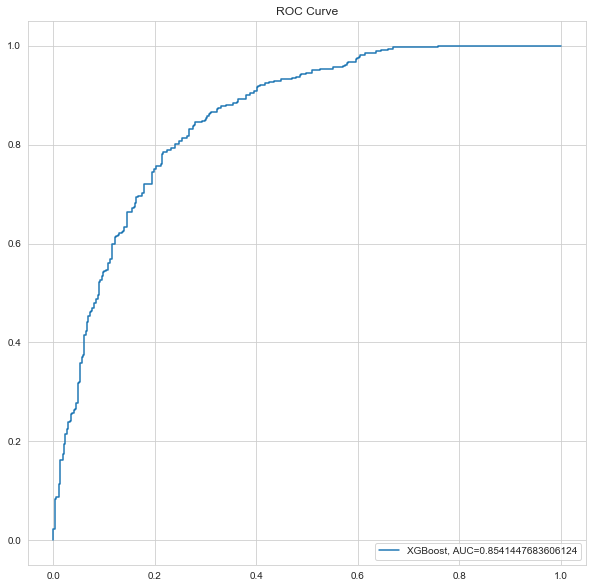

name: ExtraTrees
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       379
           1       0.76      0.78      0.77       369

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748

accuracy: 0.767379679144385
precision: 0.7572559366754618
recall: 0.7777777777777778
confusion matrix: [[287  92]
 [ 82 287]]


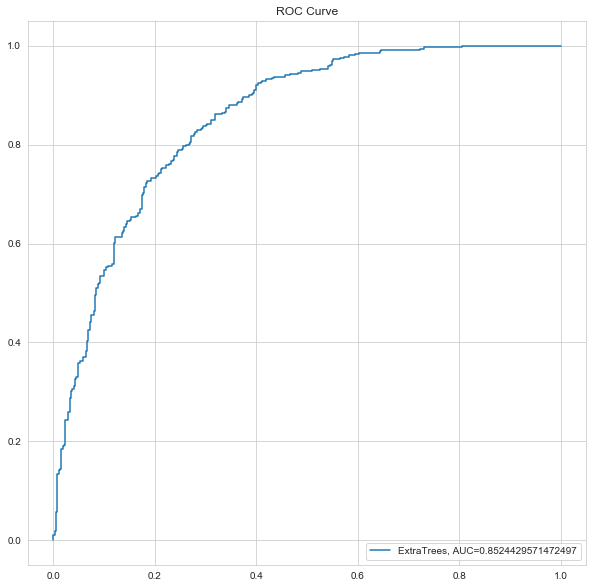

In [157]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf_algo in classifiers:    

    # Fit clf to the training set
    clf_algo.fit(X_train, y_train)    
    
    # Predict y_pred
    y_pred = clf_algo.predict(X_test)
          
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'name: {clf_name}')
    print(classification_report(y_test, y_pred))
    # Evaluate clf's accuracy on the test set 
    print(f'accuracy: {accuracy}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'confusion matrix: {cm}')
    fig, ax = plt.subplots(figsize = (10,10))
    y_prob = clf_algo.predict_proba(X_test)[::,1]
    y_pred_proba = y_prob
    fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
    auc_rand = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr_rand,tpr_rand,label=f"{clf_name}, AUC="+str(auc_rand))
    plt.legend(loc=4)
    plt.title('ROC Curve')
    plt.show()

Voting Classifier: 
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       379
           1       0.77      0.80      0.79       369

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748

accuracy: 0.7834224598930482
precision: 0.7674418604651163
recall: 0.8048780487804879
confusion matrix: [[289  90]
 [ 72 297]]


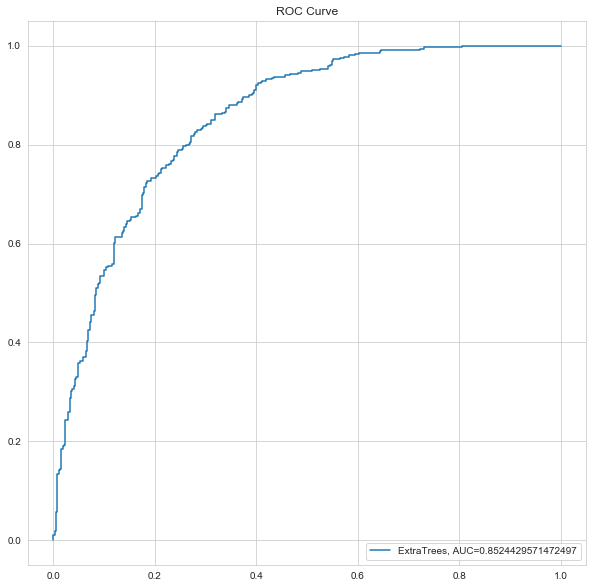

In [158]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Voting Classifier: ')
print(classification_report(y_test, y_pred))
    # Evaluate clf's accuracy on the test set 
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'confusion matrix: {cm}')
fig, ax = plt.subplots(figsize = (10,10))
y_prob = clf_algo.predict_proba(X_test)[::,1]
y_pred_proba = y_prob
fpr_rand, tpr_rand, _ = roc_curve(y_test,  y_pred_proba)
auc_rand = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rand,tpr_rand,label=f"{clf_name}, AUC="+str(auc_rand))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()